In [1]:
from __future__ import print_function

In [2]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import six

%matplotlib inline


import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

2017-01-12 12:19:33	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2017-01-12 12:19:33	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-12 12:20:17 	Initializing Study
2017-01-12 12:20:17 	Initializing Predictor configuration manager for Study
2017-01-12 12:20:17	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-12 12:20:17	Added ExtraTreesClassifier to default predictors
2017-01-12 12:20:17	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-12 12:20:17	Added ExtraTreesRegressor to default predictors
2017-01-12 12:20:17	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-12 12:20:17	Added GradientBoostingClassifier to default predictors
2017-01-12 12:20:17	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-12 12:20:17	Added GradientBoostingRegressor to default predictors
2017-01-12 12:20:17 	Loading metadata
2017-01-12 12:20:17	Loading expression data
2017-0

In [3]:
sns.set(style='whitegrid', context='paper')

In [4]:
figure_folder = 'figures/020_outrigger_rmdup_comparison'
! mkdir -p $figure_folder

In [5]:
cp -r /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2_bam_unstranded/ /projects/ps-yeolab/obotvinnik/singlecell_pnms/

In [6]:
cp -r /home/obotvinnik/projects/singlecell_pnms/analysis/outrigger_v2_rmdup_unstranded/ /projects/ps-yeolab/obotvinnik/singlecell_pnms/

In [7]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
original_folder = '{}/outrigger_v2_bam_unstranded/psi'.format(folder)
rmdup_folder = '{}/outrigger_v2_rmdup_unstranded/psi'.format(folder)

In [8]:
original_psi = pd.read_csv('{}/outrigger_psi.csv'.format(original_folder), index_col=0)
print('original_psi:', original_psi.shape)
original_psi.head()

original_psi: (50069, 251)


,CVN_01,CVN_02,CVN_03,CVN_04,CVN_05,CVN_06,CVN_07,CVN_08,CVN_09,CVN_11,...,P8_06,P8_07,P8_09,P8_10,P8_11,P8_12,P9_01,P9_02,P9_03,P9_04
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [9]:
original_se_summary = pd.read_csv('{}/se/summary.csv'.format(original_folder))
print('original_se_summary:', original_se_summary.shape)
original_se_summary.head()

original_se_summary: (8026478, 7)


,sample_id,event_id,isoform1_junction13,isoform2_junction12,isoform2_junction23,psi,notes
0,CVN_01,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
1,CVN_02,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
2,CVN_03,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
3,CVN_04,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
4,CVN_05,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads


In [10]:
original_mxe_summary = pd.read_csv('{}/mxe/summary.csv'.format(original_folder))
print('original_mxe_summary:', original_mxe_summary.shape)
original_mxe_summary.head()

original_mxe_summary: (4540841, 10)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id
0,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_01
1,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_02
2,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_03
3,isoform1=junction:chr10:101996727-102003454:-@...,11.0,NaN,0.0,10.0,7.0,1.0,Case 1: >= 10 reads on junctions that are inco...,NaN,CVN_04
4,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_05


In [11]:
rmdup_psi = pd.read_csv('{}/outrigger_psi.csv'.format(rmdup_folder), index_col=0)
print(rmdup_psi.shape)
rmdup_psi.head()

(37194, 299)


,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,...,P8_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_11_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_12_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [12]:
rmdup_psi.notnull().sum().sum()

1427838

In [13]:
rmdup_se_summary = pd.read_csv('{}/se/summary.csv'.format(rmdup_folder))
print(rmdup_se_summary.shape)
rmdup_se_summary.head()

(8985548, 7)


,sample_id,event_id,isoform1_junction13,isoform2_junction12,isoform2_junction23,psi,notes
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads


In [14]:
rmdup_mxe_summary = pd.read_csv('{}/mxe/summary.csv'.format(rmdup_folder))
print(rmdup_mxe_summary.shape)
rmdup_mxe_summary.head()

(2135458, 10)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id
0,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
1,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
2,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
3,isoform1=junction:chr10:101996727-102003454:-@...,8.0,NaN,0.0,9.0,6.0,1.0,Case 3: All junctions with insufficient reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
4,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...


In [15]:
rmdup_summary = pd.concat([rmdup_se_summary, rmdup_mxe_summary], ignore_index=True)
print(rmdup_summary.shape)
rmdup_summary['bam'] = rmdup_summary['sample_id'].copy()
rmdup_summary['sample_id'] = rmdup_summary['sample_id'].map(lambda x: '_'.join(x.split('_')[:2]))
rmdup_summary = rmdup_summary.set_index(['sample_id', 'event_id'])
rmdup_summary.head()

(11121006, 11)


,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,bam
sample_id,event_id,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...


### "original" data was run on old version of outrigger that output the wrong cases

In [16]:
original_summary = pd.concat([original_se_summary, original_mxe_summary], ignore_index=True)
original_summary
print(original_summary.shape)
original_summary = original_summary.set_index(['sample_id', 'event_id'])
original_summary.head()

(12567319, 11)


,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi
sample_id,event_id,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN


In [17]:
original_summary.groupby('notes').size()

notes
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                  1327
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                1378
Case 19a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads        41958
Case 19b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       1284
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                               480351
Case 2: Zero observed reads                                                                                                             8920535
Case 3: All junctions with insufficient reads                                                                                     

In [18]:
original_summary['notes_copy'] = original_summary['notes'].copy()
original_summary.groupby('notes_copy').size()

notes_copy
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                  1327
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                1378
Case 19a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads        41958
Case 19b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       1284
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                               480351
Case 2: Zero observed reads                                                                                                             8920535
Case 3: All junctions with insufficient reads                                                                                

In [19]:
rmdup_summary['notes_copy'] = rmdup_summary['notes'].copy()
rmdup_summary.groupby('notes_copy').size()

notes_copy
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                    29
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                  11
Case 19a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads        23939
Case 19b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads        720
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                               507010
Case 2: Zero observed reads                                                                                                             7375768
Case 3: All junctions with insufficient reads                                                                                

#### The "Xb" cases aren't correctly taken care of - the ones with insufficient reads should be "10b" not "10a"

In [20]:
# replacer = {'Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads': 
#             'Case 10b: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads',
#            'Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads':
#            'Case 11b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads',
#            'Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads':
#            'Case 12b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads'}

# original_summary['notes_copy'] = original_summary['notes'].map(lambda x: replacer[x] if x in replacer else x)
# original_summary.head()

In [21]:
# original_summary.groupby('notes_copy').size()

#### Compared to when I ran outrigger, the cases don't match up to what I have now so I have to rename them

In [23]:
notes_abbrev_renamer = (('Case 19a', 'Case 10a'), 
                        ('Case 19b', 'Case 10b'))

for pattern, replace in notes_abbrev_renamer:
    print(pattern, replace)
    original_summary['notes_copy'] = original_summary['notes_copy'].str.replace(pattern, replace)
    rmdup_summary['note_copy'] = rmdup_summary['notes_copy'].str.replace(pattern, replace)
original_summary.groupby('notes_copy').size()

Case 19a Case 10a
Case 19b Case 10b


notes_copy
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads        41958
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       1284
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                  1327
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                1378
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                               480351
Case 2: Zero observed reads                                                                                                             8920535
Case 3: All junctions with insufficient reads                                                                                

In [24]:
original_summary['notes'] = original_summary['notes_copy']

original_summary.drop('notes_copy', axis=1, inplace=True)

## Add abbreviation of notes/cases

In [25]:
original_summary['notes_abbrev'] = original_summary['notes'].str.split(':').str[0]
original_summary.head()

,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,notes_abbrev
sample_id,event_id,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2


In [26]:
rmdup_summary['notes_abbrev'] = rmdup_summary['notes'].str.split(':').str[0]
rmdup_summary.head()

,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,bam,notes_copy,note_copy,notes_abbrev
sample_id,event_id,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2


### Write reformatted original summary to csv

In [27]:
original_summary.to_csv('{}/summary_formatted.csv'.format(original_folder))

In [28]:
rmdup_summary.to_csv('{}/summary_formatted.csv'.format(rmdup_folder))

## Join summaries to tidy, tall dataframe

In [29]:
rmdup_summary['dataset'] = 'rmdup'
original_summary['dataset'] = 'original'

In [30]:
summary_tidy = pd.concat([rmdup_summary.reset_index(), original_summary.reset_index()], ignore_index=True)
print(summary_tidy.shape)
summary_tidy.head()

(23688325, 16)


,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,note_copy,notes,notes_abbrev,notes_copy,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_05


In [31]:
summary_tidy.query('(psi > 0) & (dataset == "rmdup")').head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,note_copy,notes,notes_abbrev,notes_copy,psi,sample_id
155,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,53.0,47.0,NaN,Case 7: Inclusion,Case 7: Inclusion,Case 7,Case 7: Inclusion,1.0,MSA_24
250,P2_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,238.0,218.0,NaN,Case 7: Inclusion,Case 7: Inclusion,Case 7,Case 7: Inclusion,1.0,P2_06
257,P2_13_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,44.0,51.0,NaN,Case 7: Inclusion,Case 7: Inclusion,Case 7,Case 7: Inclusion,1.0,P2_13
287,P8_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,257.0,217.0,NaN,Case 7: Inclusion,Case 7: Inclusion,Case 7,Case 7: Inclusion,1.0,P8_02
553,P2_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100190428-100193696:-|...,NaN,NaN,0.0,NaN,142.0,208.0,NaN,Case 7: Inclusion,Case 7: Inclusion,Case 7,Case 7: Inclusion,1.0,P2_10


In [32]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

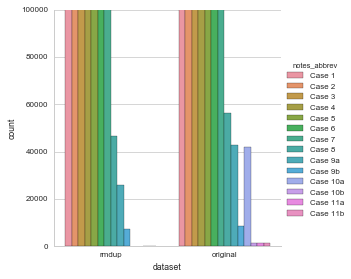

In [33]:
g = sns.factorplot(x='dataset', hue='notes_abbrev', data=summary_tidy, kind='count', hue_order=case_order)
g.savefig('{}/cases_per_dataset_countplot_fullsize.pdf'.format(figure_folder))

ymax = 1e5
g.set(ylim=(0, ymax))
g.savefig('{}/cases_per_dataset_countplot_ymax{}.pdf'.format(figure_folder, ymax))

In [34]:
summary_tidy.head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,note_copy,notes,notes_abbrev,notes_copy,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_05


In [35]:
summary_tidy.to_csv('{}/outrigger_summary_original_rmdup_combined_tidy.csv'.format(folder), index=False)

In [36]:
compatible_junction_cols = [x for x in summary_tidy if x.startswith('isoform') and 'junction' in x]
compatible_junction_cols

['isoform1_junction13',
 'isoform1_junction34',
 'isoform2_junction12',
 'isoform2_junction23',
 'isoform2_junction24']

In [37]:
incompatible_junction_cols = [x for x in summary_tidy if x.startswith('incompatible') and 'junction' in x]
incompatible_junction_cols

['incompatible_junction0', 'incompatible_junction1']

In [38]:
junction_cols = incompatible_junction_cols + compatible_junction_cols
junction_cols

['incompatible_junction0',
 'incompatible_junction1',
 'isoform1_junction13',
 'isoform1_junction34',
 'isoform2_junction12',
 'isoform2_junction23',
 'isoform2_junction24']

In [39]:
summary_tidy_zero_na = summary_tidy.copy()

mask = summary_tidy_zero_na[junction_cols] > 0
summary_tidy_zero_na[junction_cols] = summary_tidy_zero_na[junction_cols][mask]
summary_tidy_zero_na.head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,note_copy,notes,notes_abbrev,notes_copy,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,Case 2: Zero observed reads,NaN,CVN_05


In [40]:
junction_reads_tidy = pd.melt(summary_tidy_zero_na, id_vars=['sample_id', 'event_id', 'dataset'], 
        value_vars=junction_cols).dropna()
print(junction_reads_tidy.shape)
junction_reads_tidy.head()

(12212709, 5)


,sample_id,event_id,dataset,variable,value
8985551,CVN_04,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,8.0
8985559,CVN_12,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,42.0
8985564,CVN_17,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,17.0
8985565,CVN_18,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,41.0
8985566,CVN_19,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,26.0


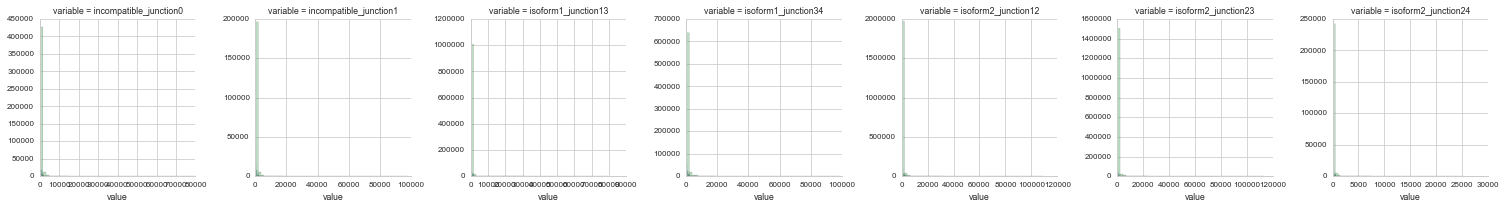

In [41]:
g = sns.FacetGrid(junction_reads_tidy, hue='dataset', col='variable', sharex=False, sharey=False)
g.map(sns.distplot, 'value', kde=False)

## Join summaries to wide dataframe

In [42]:
summary = original_summary.join(rmdup_summary, lsuffix='_original', rsuffix='_rmdup')
print(summary.shape)
summary.head()

(12567319, 25)


,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_abbrev_original,...,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup


## Write the combined dataframes to one file

In [43]:
folder

'/projects/ps-yeolab/obotvinnik/singlecell_pnms'

In [44]:
summary.to_csv('{}/outrigger_summary_original_rmdup_combined_wide.csv'.format(folder))

In [45]:
summary_fillna = summary.fillna({'psi_original': -0.1, 'psi_rmdup': -0.1})
summary_fillna.head()

,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_abbrev_original,...,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup


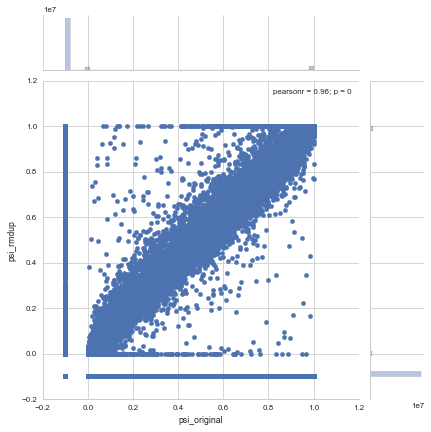

In [46]:
g = sns.jointplot('psi_original', 'psi_rmdup', summary_fillna)

## Facetgrid of rmdup vs original

In [47]:
summary_fillna['either_na'] = "0 <= Psi <= 1"
summary_fillna.loc[summary['psi_rmdup'].isnull(), 'either_na'] = 'rmdup NA'
summary_fillna.loc[summary['psi_original'].isnull(), 'either_na'] = 'original NA'
summary_fillna.head()

,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_abbrev_original,...,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup,either_na
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup,original NA
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup,original NA
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup,original NA
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup,original NA
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2,...,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup,original NA


In [48]:
summary_fillna.shape

(12567319, 26)

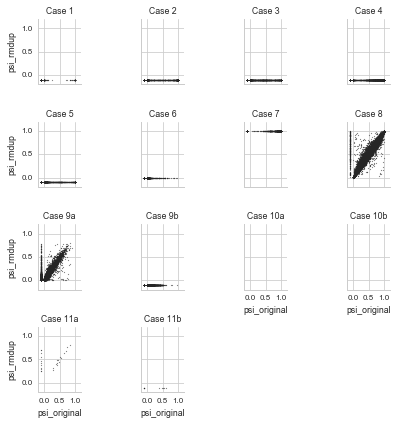

In [49]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, 
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA']
#                   palette=['#262626', ''],
                  col_order=case_order, size=1.5)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/psi_original_vs_rmdup_faceted_by_rmdup_case.pdf'.format(figure_folder), dpi=300)

## Add color for which is NA

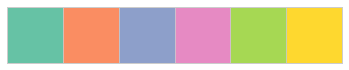

In [50]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
original_na_color = set2[1]
rmdup_na_color = set2[2]

In [51]:
gridspec_kws = dict(wspace=0.01, hspace=0.05)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/axisgrid.py:313: UserWarning: `gridspec_kws` ignored when using `col_wrap`
  warnings.warn("`gridspec_kws` ignored when using `col_wrap`")


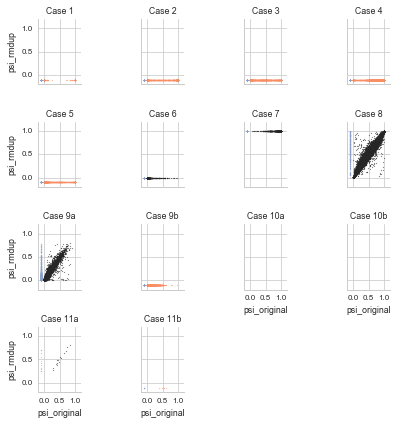

In [ ]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)

In [ ]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)